<a href="https://colab.research.google.com/github/753x/StudyLibrary/blob/main/DeepLearning/Chapter8-3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **8.3 더 빠르게(딥러닝 고속화)**

빅 데이터와 네트워크의 발전으로 딥러닝에서는 대량의 연산을 수행해야 함


**과거** : 주로 CPU가 계산을 담당

> **BUT** CPU만으로는 딥러닝을 처리하기엔 부족함

**현재** : 복수의 GPU를 활용해 대량의 연산을 고속으로 처리함

## **8.3.1 풀어야 할 숙제**

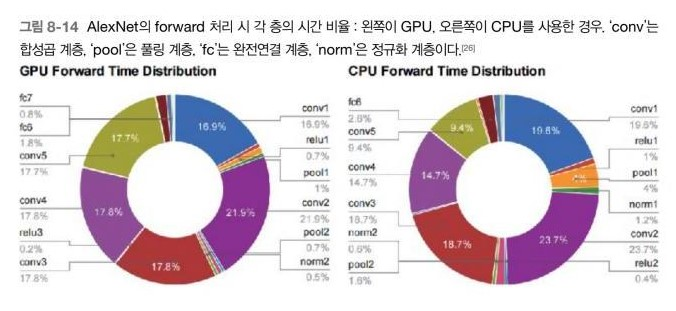

즉 오랜 시간을 합성곱 계층에서 소요함

GPU : 95%

CPU : 89%

> 합성곱 계층에서 이뤄지는 연산을 어떻게 고속으로 효율적으로 하느냐가 딥러닝의 과제

## **8.3.2 GPU를 활용한 고속화**

GPU는 원래 그래픽 전용 보드에 이용

> **BUT** 최근에는 범용 수치 연산에도 사용

GPU는 병렬 수치 연산을 고속으로 처리 가능



> **GPU 컴퓨팅** : GPU를 통해 범용 수치 연산을 수행하는 것

딥러닝에서는 대량의 단일 곱셈-누산(또는 큰 행렬의 곱)을 수행해야 함

> 이런 대량 병렬 연산은 GPU의 특기(CPU는 연속적인 복잡한 계산을 잘 함)

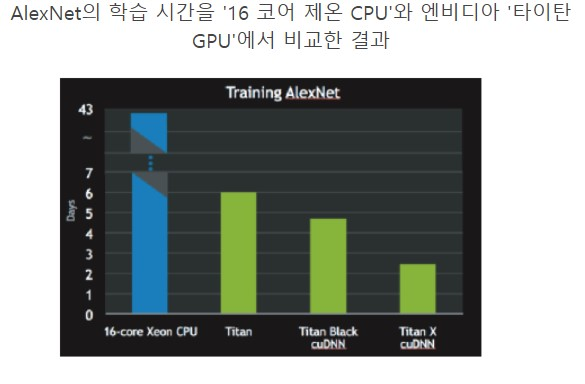

**CPU는 40일 걸리는 걸 GPU는 6일 까지 단축**

 cuDNN이라는 딥러닝에 최적화된 라이브러리를 이용하면 더욱 빨라짐을 확인 할 수 있음

GPU는 주로 엔비디아와 AMD가 제공함



*   둘 모두 범용 수치 연산에 적용할 수 있지만 아직까지 딥러닝과 더 친한 쪽은 엔비디아
*   CUDA를 사용하기 때문 - cuDNN은 CUDA 위에서 동작하는 라이브러리로, 딥러닝에 최적화된 함수 등이 구현되어 있음



## **8.3.3 분산 학습**

GPU로 딥러닝 연산을 꽤 가속할 수 있지만, 심층 신경망에서는 학습에 며칠 혹은 몇주가 걸리기도 함

1회 학습에 걸리는 시간을 최대한 단축하고 싶다면 딥러닝 학습을 수평 확장(scale out)하자는 아이디어(분산학습)이/가 중요해짐

최근에는 다수의 GPU와 기기로 분산하기도 함



*   예) 구글의 텐서플로와 마이크로소프트의 CNTK는 분산학습에 역점을 두고 개발 중

*   거대한 데이터센터의 저지연,고처리량 네트워크 위에서 분산 학습은 놀라운 효과를 보임



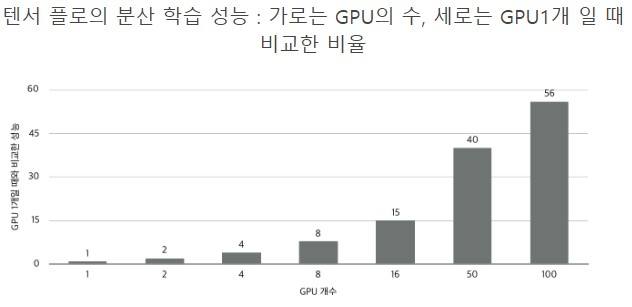

**GPU가 100개일 때 하나일 때보다 56배가 빨라짐.**

**즉, 7일 걸리는 작업을 3시간 만에 끝냄**

## **8.3.4 연산 정밀도와 비트 줄이기**

딥러닝은 높은 수치 정밀도(수치를 몇 비트로 표현하느냐)를 요구하지 않음



*   신경망은 입력 이미지에 노이즈가 조금 섞여 있어도 출력 결과가 잘 달라지지 않는 강건함을 보여줌

*   이런 견고성 때문에 신경망을 흐르는 데이터를 '퇴화'시켜도 출력에 주는 영향이 적음



 > 컴퓨터에서 실수를 표현하는 방식으로 **32비트 단정밀도**와 **64비트 배정밀도** 부동소수점 등의 포맷이 있지만 지금까지의 실험으로는 딥러닝은 **16비트 반정밀도**만 사용해도 학습에 문제가 없다고 알려져 있음


*   엔비디아의 2016년 GPU인 파스칼 아키텍처는 이 포맷을 지원하여, 이제는 반정밀도 부동소수점이 표준적으로 이용되리라 생각

*  넘 파이도 16비트 반정밀도 부동소수점도 지원하며, 이를 사용해도 정확도가 떨어지지 않는 것을 확인



저비트 신경망의 단점 : 정확도가 떨어짐

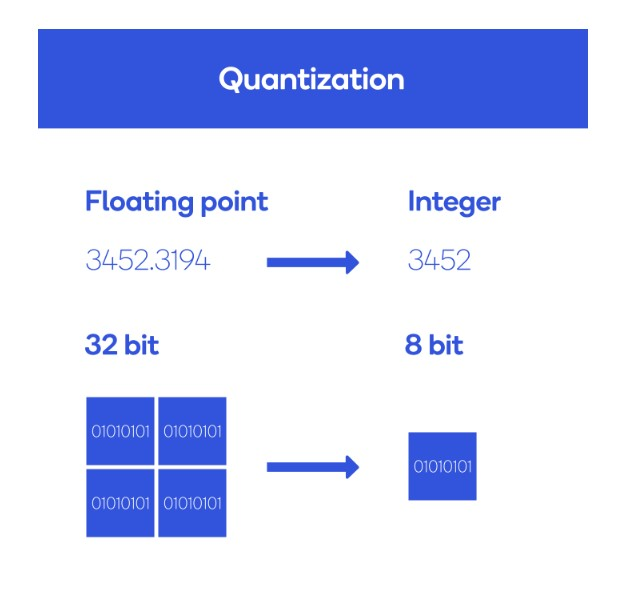

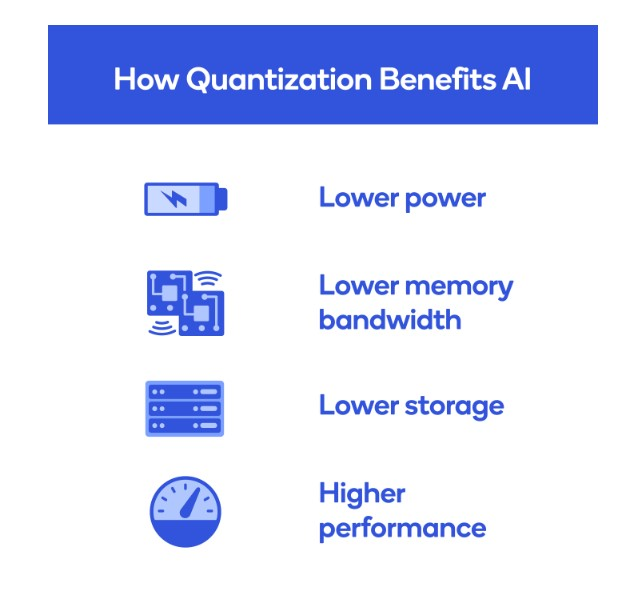

정확도에 영향을 주지 않으면서 32비트 부동소수점 가중치 매개변수를 8비트 정수형으로 양자화

https://www.tensorflow.org/lite/performance/post_training_integer_quant?hl=ko